<div style="text-align: center; font-family: 'Georgia'; font-size: 19px;">
    <h2>Lista 2</h2>
</div>

<div style="text-align;font-family: 'Georgia'; font-size: 12px;">
    <h2>Zadanie 5</h2>
</div>  

W zadaniu 5 należy dla wysymulowanych danych zastosować metodę znajdowania punktu zmiany reżimu opisaną w pracy: : Gajda Janusz, Sikora Grzegorz, Wyłomańska Agnieszka: Regime variance testing -
a quantile approach, Acta Phys. Polon B 44(5), 1015-1035, 2013. Następnie sprawdzić poprawność metody wykorzystując symulacje Monte Carlo. 

<div style="text-align;font-family: 'Georgia'; font-size: 12px;">
    <h2>Pierwsza część zadania</h2>
</div>  

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

In [114]:
sigma_values = [0.1, 0.5, 0.9, 1.1, 1.5, 2.0, 3.0]  
MC = 100
N1=100
N2=1000



In [115]:
def generowanie_danych(N, sigma, change_point_index):
    X1 = np.random.normal(0, sigma**2, change_point_index)
    X2 = np.random.normal(0, 1, N - change_point_index)
    return np.concatenate([X1, X2])

In [116]:
def prosta_regresji(x, y):
    beta = np.sum(x * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
    alpha = np.mean(y) - beta * np.mean(x)
    return alpha, beta

In [117]:
def znajdowanie_p_zmiany(dane, N):
    C_n = np.cumsum(dane**2)  
    V_values = []

    for k in range(2, N - 2):
        # Pierwszy segment
        X1 = np.arange(1, k + 1)
        Y1 = C_n[:k]   

        # Drugi segment
        X2 = np.arange(k + 1, N + 1)
        Y2 = C_n[k:]   

        alpha1_k, beta1_k = prosta_regresji(X1, Y1)
        alpha2_k, beta2_k = prosta_regresji(X2, Y2)

        V_k = np.sum((Y1 - (alpha1_k + beta1_k * X1))**2) + np.sum((Y2 - (alpha2_k + beta2_k * X2))**2)
        V_values.append(V_k)

    optimal_k = np.argmin(V_values) 
    return optimal_k,C_n


In [118]:
def znajdowanie_p_zmiany2(dane, N):
    C_n = np.cumsum(dane**2)  
    V_values = []

    for k in range(2, N - 2):
        # Pierwszy segment
        X1 = np.arange(1, k + 1)
        Y1 = C_n[:k]   

        # Drugi segment
        X2 = np.arange(k + 1, N + 1)
        Y2 = C_n[k:]   

        alpha1_k, beta1_k = prosta_regresji(X1, Y1)
        alpha2_k, beta2_k = prosta_regresji(X2, Y2)

        V_k = np.sum((Y1 - (alpha1_k + beta1_k * X1))**2) + np.sum((Y2 - (alpha2_k + beta2_k * X2))**2)
        V_values.append(V_k)

    optimal_k = np.argmin(V_values) 
    return optimal_k

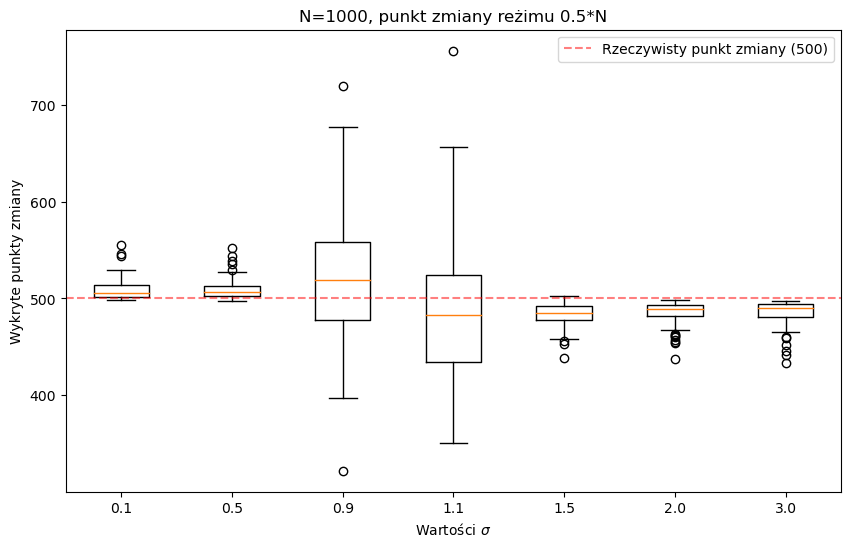

In [158]:
results = {sigma: [] for sigma in sigma_values}

for sigma in sigma_values:
    for _ in range(MC):
        dane = generowanie_danych(N2, sigma, int(N2 * 0.5))
        detected_change_point = znajdowanie_p_zmiany2(dane, N2)
        results[sigma].append(detected_change_point)

plt.figure(figsize=(10, 6))
plt.boxplot([results[sigma] for sigma in sigma_values], labels=sigma_values)
plt.axhline(y= int(N2 * 0.5), color='red', linestyle='--', label=f'Rzeczywisty punkt zmiany ({ int(N2 * 0.5)})', alpha=0.5)
plt.xlabel("Wartości $\sigma$")
plt.ylabel("Wykryte punkty zmiany")
plt.title("N=1000, punkt zmiany reżimu 0.5*N")
plt.legend()
plt.show()  

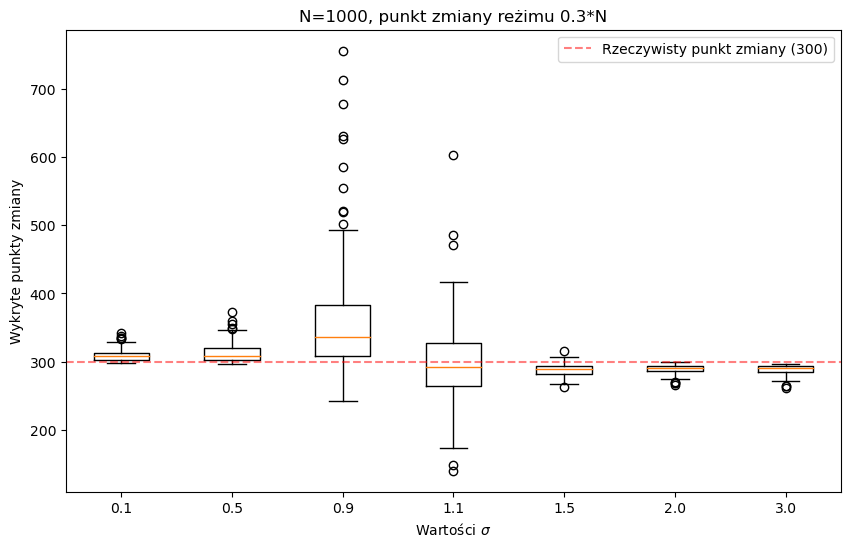

In [159]:
results = {sigma: [] for sigma in sigma_values}

for sigma in sigma_values:
    for _ in range(MC):
        dane = generowanie_danych(N2, sigma, int(N2 * 0.3))
        detected_change_point = znajdowanie_p_zmiany2(dane, N2)
        results[sigma].append(detected_change_point)

plt.figure(figsize=(10, 6))
plt.boxplot([results[sigma] for sigma in sigma_values], labels=sigma_values)
plt.axhline(y= int(N2 * 0.3), color='red', linestyle='--', label=f'Rzeczywisty punkt zmiany ({ int(N2 * 0.3)})', alpha=0.5)
plt.xlabel("Wartości $\sigma$")
plt.ylabel("Wykryte punkty zmiany")
plt.title("N=1000, punkt zmiany reżimu 0.3*N")
plt.legend()
plt.show() 

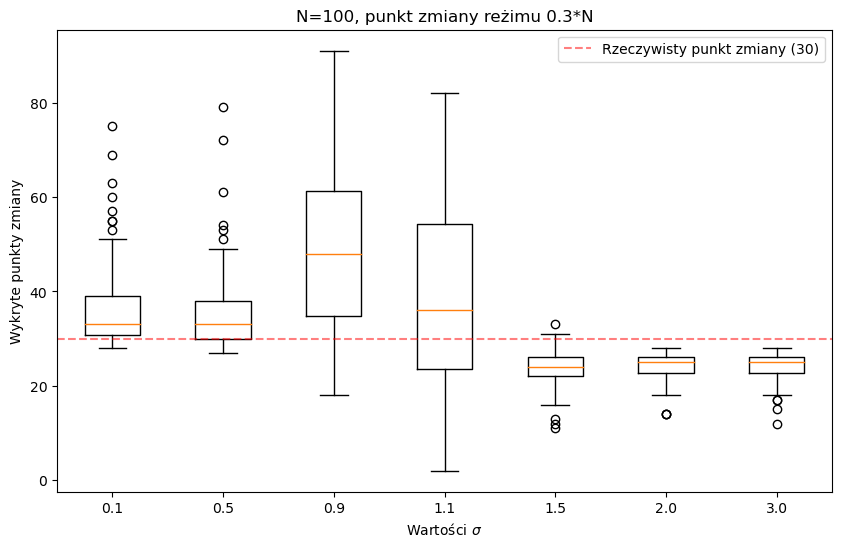

In [21]:
results = {sigma: [] for sigma in sigma_values}

for sigma in sigma_values:
    for _ in range(MC):
        dane = generowanie_danych(N1, sigma, int(N1 * 0.3))
        detected_change_point = znajdowanie_p_zmiany2(dane, N1)
        results[sigma].append(detected_change_point)

plt.figure(figsize=(10, 6))
plt.boxplot([results[sigma] for sigma in sigma_values], labels=sigma_values)
plt.axhline(y= int(N1 * 0.3), color='red', linestyle='--', label=f'Rzeczywisty punkt zmiany ({ int(N1 * 0.3)})', alpha=0.5)
plt.xlabel("Wartości $\sigma$")
plt.ylabel("Wykryte punkty zmiany")
plt.title("N=100, punkt zmiany reżimu 0.3*N")
plt.legend()
plt.show() 

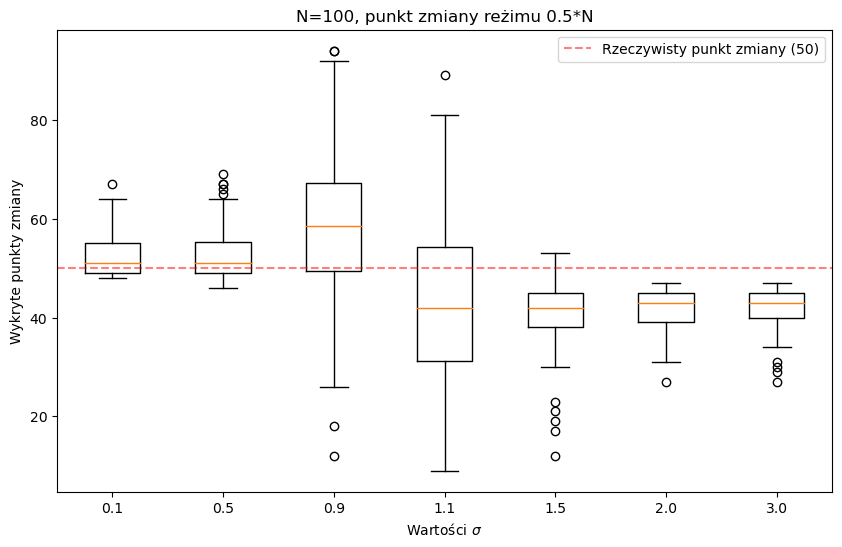

In [119]:
results = {sigma: [] for sigma in sigma_values}

for sigma in sigma_values:
    for _ in range(MC):
        dane = generowanie_danych(N1, sigma, int(N1 * 0.5))
        detected_change_point = znajdowanie_p_zmiany2(dane, N1)
        results[sigma].append(detected_change_point)

plt.figure(figsize=(10, 6))
plt.boxplot([results[sigma] for sigma in sigma_values], labels=sigma_values)
plt.axhline(y= int(N1 * 0.5), color='red', linestyle='--', label=f'Rzeczywisty punkt zmiany ({ int(N1 * 0.5)})', alpha=0.5)
plt.xlabel("Wartości $\sigma$")
plt.ylabel("Wykryte punkty zmiany")
plt.title("N=100, punkt zmiany reżimu 0.5*N")
plt.legend()
plt.show() 

<div style="text-align;font-family: 'Georgia'; font-size: 12px;">
    <h2>Druga część zadania</h2>
</div>  

In [53]:
def sprawdzenie_punktu_zmiany(dane, k_gwiazdka, alpha=0.05):
    X1 = dane[:k_gwiazdka]  
    X2 = dane[k_gwiazdka:]  

    sigma1 = np.std(X1)
    sigma2 = np.std(X2)

    if sigma1 < sigma2:
        A, B = X1, X2
    else:
        A, B = X2, X1

    q1 = np.percentile(A, 100 * alpha / 2)
    q2 = np.percentile(A, 100 * (1 - alpha / 2))

    D = np.sum((B >= q1) & (B <= q2))

    n = len(B)
    p_value = binom.cdf(D, n=n, p=1-alpha)

    if p_value > alpha:
        print("Brak podstaw do odrzucenia hipotezy zerowej.")
        return False 
    else:
        print("Odrzucono hipotezę zerową. Punkt zmiany reżimu.")
        return True 

Odrzucono hipotezę zerową. Punkt zmiany reżimu.
Odrzucono hipotezę zerową. Punkt zmiany reżimu.
Odrzucono hipotezę zerową. Punkt zmiany reżimu.
Odrzucono hipotezę zerową. Punkt zmiany reżimu.
Odrzucono hipotezę zerową. Punkt zmiany reżimu.
Odrzucono hipotezę zerową. Punkt zmiany reżimu.
Odrzucono hipotezę zerową. Punkt zmiany reżimu.
Odrzucono hipotezę zerową. Punkt zmiany reżimu.
Odrzucono hipotezę zerową. Punkt zmiany reżimu.
Odrzucono hipotezę zerową. Punkt zmiany reżimu.
Odrzucono hipotezę zerową. Punkt zmiany reżimu.
Odrzucono hipotezę zerową. Punkt zmiany reżimu.
Odrzucono hipotezę zerową. Punkt zmiany reżimu.
Odrzucono hipotezę zerową. Punkt zmiany reżimu.
Odrzucono hipotezę zerową. Punkt zmiany reżimu.
Odrzucono hipotezę zerową. Punkt zmiany reżimu.
Odrzucono hipotezę zerową. Punkt zmiany reżimu.
Odrzucono hipotezę zerową. Punkt zmiany reżimu.
Odrzucono hipotezę zerową. Punkt zmiany reżimu.
Odrzucono hipotezę zerową. Punkt zmiany reżimu.
Odrzucono hipotezę zerową. Punkt zmiany 

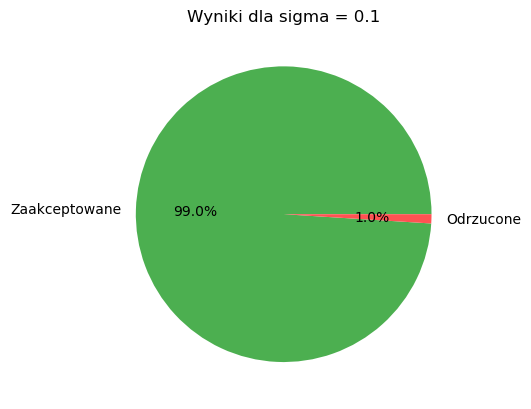

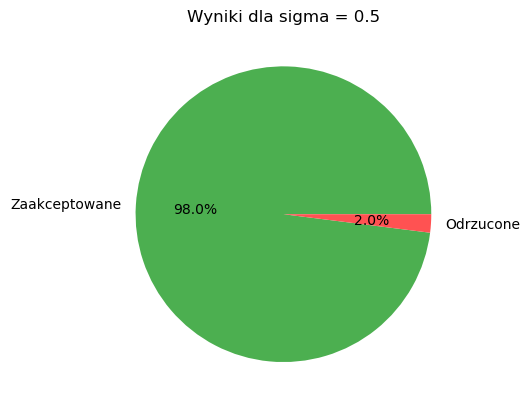

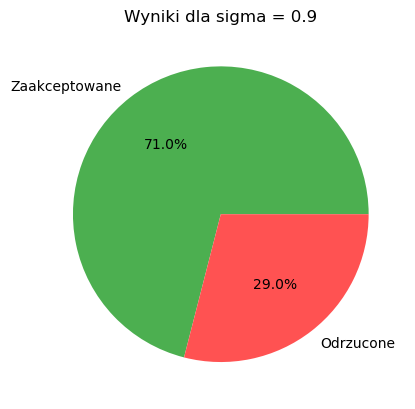

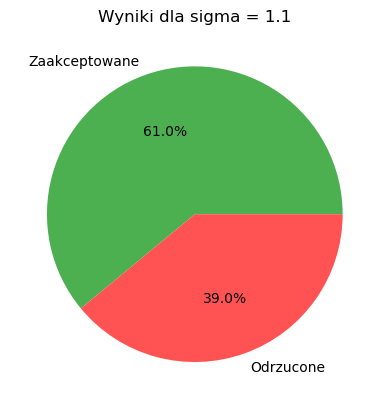

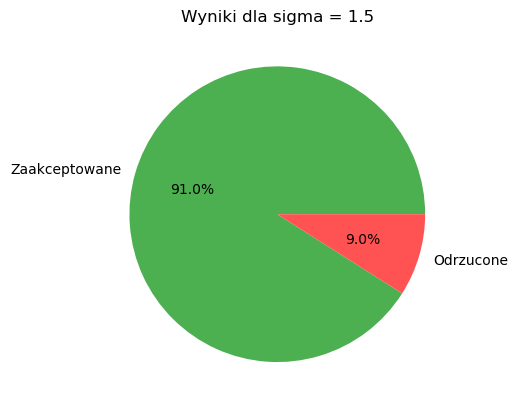

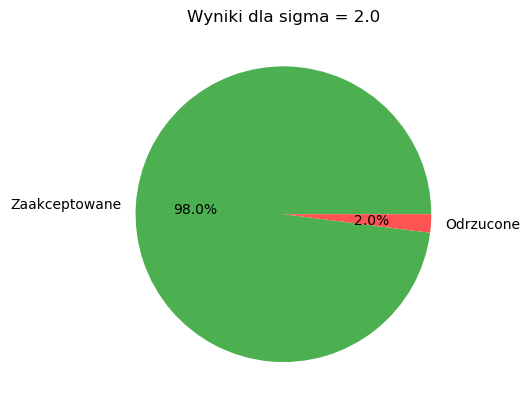

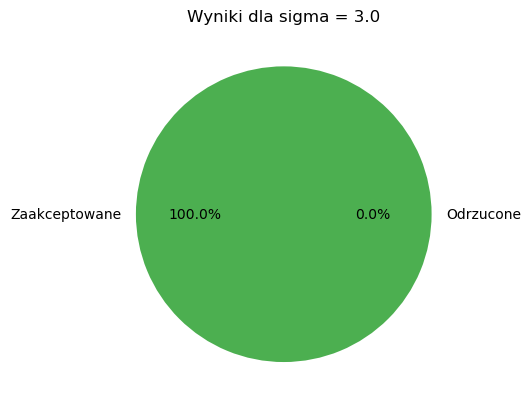

In [91]:
results = {sigma: {"zaakceptowane": 0, "odrzucone": 0} for sigma in sigma_values}

for sigma in sigma_values:
    for _ in range(MC):
        dane = generowanie_danych(N1, sigma, int(N1 * 0.3))
        k_gwiazdka, C_n = znajdowanie_p_zmiany(dane, N1)
        is_change, _ = sprawdzenie_punktu_zmiany(dane, k_gwiazdka)
        
        if is_change:
            results[sigma]["zaakceptowane"] += 1
        else:
            results[sigma]["odrzucone"] += 1


for sigma in sigma_values:
    zaakceptowane = results[sigma]["zaakceptowane"]
    odrzucone = results[sigma]["odrzucone"]
    
    plt.figure()
    plt.pie(
        [zaakceptowane, odrzucone],
        labels=["Zaakceptowane", "Odrzucone"],
        autopct='%1.1f%%',
        colors=['#4CAF50', '#FF5252']
    )
    plt.title(f'Wyniki dla sigma = {sigma}')
    plt.show()

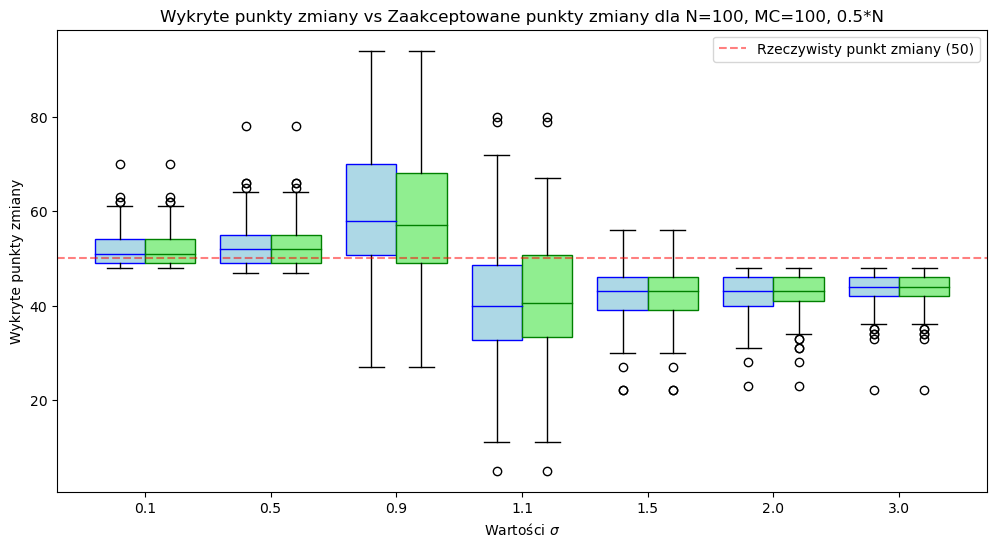

In [155]:
alpha = 0.05  
results_detected = {sigma: [] for sigma in sigma_values}
results_accepted = {sigma: [] for sigma in sigma_values}

for sigma in sigma_values:
    detected_points = []  # Lista do przechowywania wykrytych punktów
    zaakceptowane_punkty = []  # Lista do przechowywania zaakceptowanych punktów
    
    for _ in range(MC):
        dane = generowanie_danych(N1, sigma, int(N1 * 0.5))
        detected_change_point= znajdowanie_p_zmiany2(dane, N1)
        detected_points.append(detected_change_point)
        
        czy_zmiana = sprawdzenie_punktu_zmiany(dane, detected_change_point, alpha)
        if czy_zmiana:
            zaakceptowane_punkty.append(detected_change_point)
        

    results_detected[sigma] = detected_points
    results_accepted[sigma] = zaakceptowane_punkty

boxplot_data_detected = [results_detected[sigma] for sigma in sigma_values]
boxplot_data_accepted = [results_accepted[sigma] for sigma in sigma_values]

plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data_detected, positions=np.arange(len(sigma_values)), widths=0.4, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='blue'), 
            labels=sigma_values)
plt.boxplot(boxplot_data_accepted, positions=np.arange(len(sigma_values)) + 0.4, widths=0.4, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='green'), medianprops=dict(color='green'))
plt.axhline(y=int(N1 * 0.5), color='red', linestyle='--', label=f'Rzeczywisty punkt zmiany ({int(N1 * 0.5)})', alpha=0.5)

plt.xticks(np.arange(len(sigma_values)) + 0.2, sigma_values) 
plt.xlabel("Wartości $\sigma$")
plt.ylabel("Wykryte punkty zmiany")
plt.title("Wykryte punkty zmiany vs Zaakceptowane punkty zmiany dla N=100, MC=100, 0.5*N")
plt.legend()
plt.show()


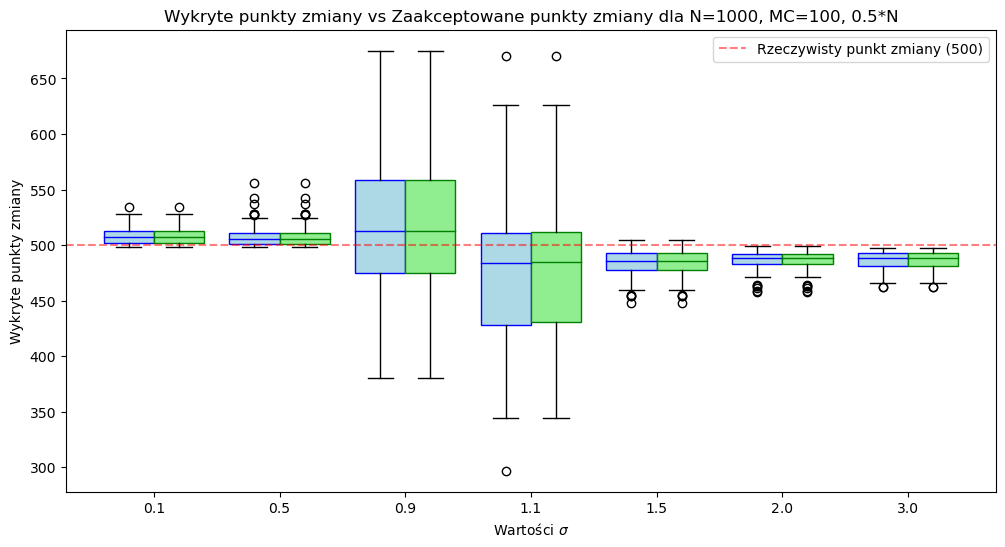

In [157]:
alpha = 0.05  
results_detected = {sigma: [] for sigma in sigma_values}
results_accepted = {sigma: [] for sigma in sigma_values}

for sigma in sigma_values:
    detected_points = []  # Lista do przechowywania wykrytych punktów
    zaakceptowane_punkty = []  # Lista do przechowywania zaakceptowanych punktów
    
    for _ in range(MC):
        dane = generowanie_danych(N2, sigma, int(N2 * 0.5))
        detected_change_point = znajdowanie_p_zmiany2(dane, N2)
        detected_points.append(detected_change_point)
        
        czy_zmiana = sprawdzenie_punktu_zmiany(dane, detected_change_point, alpha)
        if czy_zmiana:
            zaakceptowane_punkty.append(detected_change_point)
        

    results_detected[sigma] = detected_points
    results_accepted[sigma] = zaakceptowane_punkty

boxplot_data_detected = [results_detected[sigma] for sigma in sigma_values]
boxplot_data_accepted = [results_accepted[sigma] for sigma in sigma_values]

plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data_detected, positions=np.arange(len(sigma_values)), widths=0.4, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='blue'), 
            labels=sigma_values)
plt.boxplot(boxplot_data_accepted, positions=np.arange(len(sigma_values)) + 0.4, widths=0.4, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='green'), medianprops=dict(color='green'), )
plt.axhline(y=int(N2 * 0.5), color='red', linestyle='--', label=f'Rzeczywisty punkt zmiany ({int(N2 * 0.5)})', alpha=0.5)

plt.xticks(np.arange(len(sigma_values)) + 0.2, sigma_values) 
plt.xlabel("Wartości $\sigma$")
plt.ylabel("Wykryte punkty zmiany")
plt.title("Wykryte punkty zmiany vs Zaakceptowane punkty zmiany dla N=1000, MC=100, 0.5*N")
plt.legend()
plt.show()


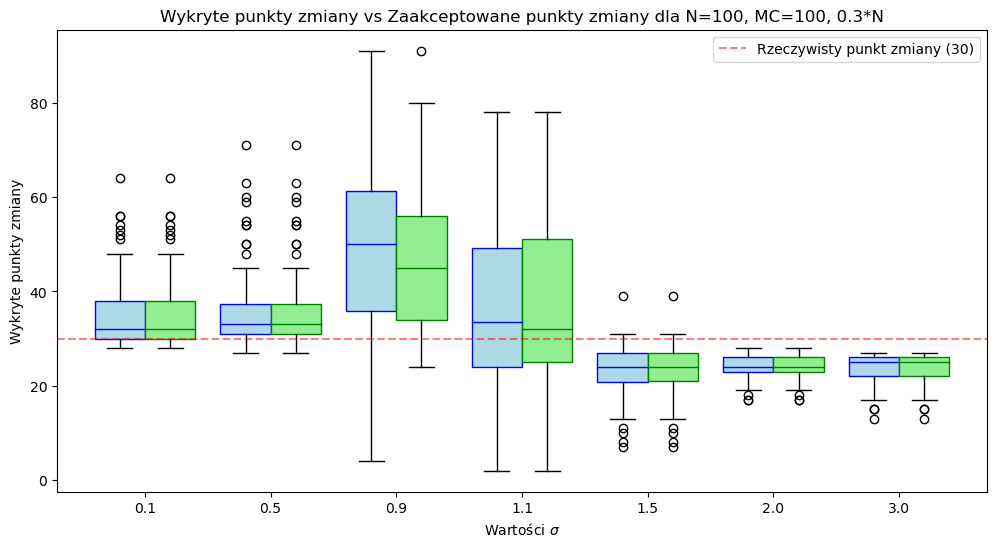

In [164]:
alpha = 0.05  
results_detected = {sigma: [] for sigma in sigma_values}
results_accepted = {sigma: [] for sigma in sigma_values}

for sigma in sigma_values:
    detected_points = []  # Lista do przechowywania wykrytych punktów
    zaakceptowane_punkty = []  # Lista do przechowywania zaakceptowanych punktów
    
    for _ in range(MC):
        dane = generowanie_danych(N1, sigma, int(N1 * 0.3))
        detected_change_point= znajdowanie_p_zmiany2(dane, N1)
        detected_points.append(detected_change_point)
        
        czy_zmiana = sprawdzenie_punktu_zmiany(dane, detected_change_point, alpha)
        if czy_zmiana:
            zaakceptowane_punkty.append(detected_change_point)
        

    results_detected[sigma] = detected_points
    results_accepted[sigma] = zaakceptowane_punkty

boxplot_data_detected = [results_detected[sigma] for sigma in sigma_values]
boxplot_data_accepted = [results_accepted[sigma] for sigma in sigma_values]

plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data_detected, positions=np.arange(len(sigma_values)), widths=0.4, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='blue'), 
            labels=sigma_values)
plt.boxplot(boxplot_data_accepted, positions=np.arange(len(sigma_values)) + 0.4, widths=0.4, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='green'), medianprops=dict(color='green'), )
plt.axhline(y=int(N1 * 0.3), color='red', linestyle='--', label=f'Rzeczywisty punkt zmiany ({int(N1 * 0.3)})', alpha=0.5)

plt.xticks(np.arange(len(sigma_values)) + 0.2, sigma_values) 
plt.xlabel("Wartości $\sigma$")
plt.ylabel("Wykryte punkty zmiany")
plt.title("Wykryte punkty zmiany vs Zaakceptowane punkty zmiany dla N=100, MC=100, 0.3*N")
plt.legend()
plt.show()
